In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t))
    x[1]=x0
    for i=1:length(t)-1
        x0=x0-(x0*γ*Δt)+(sqrt(2*Δt)*randn())
        @inbounds x[1+i]=x0
    end
    return x
end

OUH (generic function with 1 method)

  5.603847 seconds (12.43 M allocations: 622.753 MiB, 3.37% gc time)


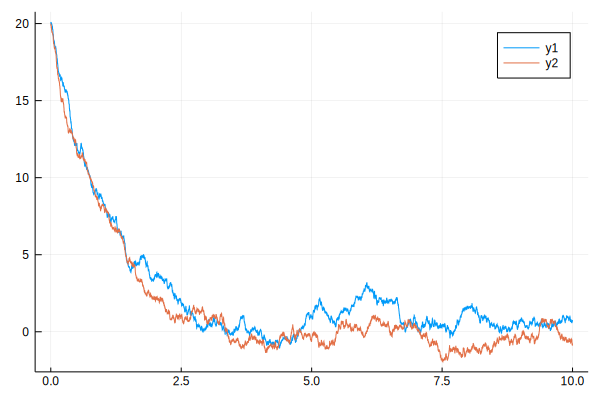

In [3]:
@time begin
    Δt=0.001
    N=10.0
    x0=20.0
    γ=1.0
    t=0:Δt:N
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt);
    plot(t,K)
    plot!(t,T)
end

In [4]:
i=100
Δs=Δt
R=diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2


3×3 Array{Float64,2}:
  0.999832      0.0183529  0.000165537
 -0.0183529     0.999669   0.0180394  
  0.000165537  -0.0180394  0.999837   

In [12]:
function eigen2(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    eigen(R)
end

eigen2 (generic function with 1 method)

In [13]:
@time begin
    γ=1.0
    x0=0.0
    Δt=0.1
    N=12
    t=0:Δt:N
    Δs=Δt
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt)
    F=eigen2(length(t),K,T,Δs)
end

  0.058170 seconds (202.94 k allocations: 10.261 MiB)


Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
3-element Array{Complex{Float64},1}:
 -0.02277724553390681 - 1.0111762877615627im
 -0.02277724553390681 + 1.0111762877615627im
   1.0124447083925063 + 0.0im               
eigenvectors:
3×3 Array{Complex{Float64},2}:
  0.703001-0.0im        0.703001+0.0im       -0.112282+0.0im
 0.0499993+0.558922im  0.0499993-0.558922im   0.609201+0.0im
 0.0631687-0.432327im  0.0631687+0.432327im   0.785027+0.0im

In [7]:
function lam_eigenvals(γ::Float64,x0::Float64,Δt::Float64,t::AbstractArray,Δs::Float64,tiradas::Int64)
    λ=Vector{Complex{Float64}}(undef,3*tiradas)
    for i=1:tiradas
        K=OUH(x0,γ,t,Δt)
        T=OUH(x0,γ,t,Δt)
        a=eigen2(length(t),K,T,Δs).values
        @inbounds λ[3*i-2]=a[1]
        @inbounds λ[3*i-1]=a[2]
        @inbounds λ[3*i-0]=a[3]
    end
    return λ
end

lam_eigenvals (generic function with 1 method)

In [9]:
γ=1.0
tiradas=500
x0=20.0
Δt=0.001
N=100
t=0:Δt:N
Δs=Δt
step=100 #Para animar
length(1:step:length(t))


1001

In [26]:
@time λ=lam_eigenvals(γ,x0,Δt,t,Δs,tiradas);

 39.433331 seconds (315.05 M allocations: 15.054 GiB, 5.79% gc time)


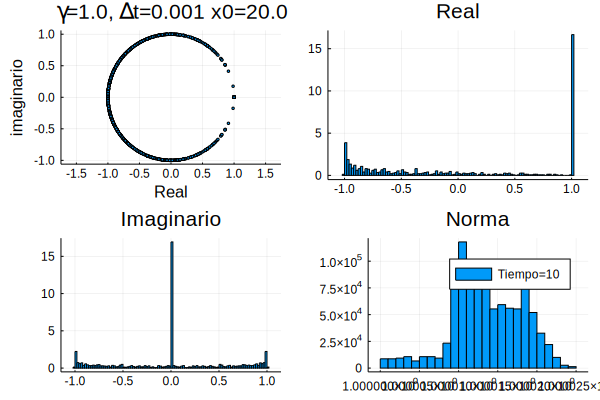

In [27]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)")
Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")
plot(Q1,Q2,Q3,Q4,layout=l)

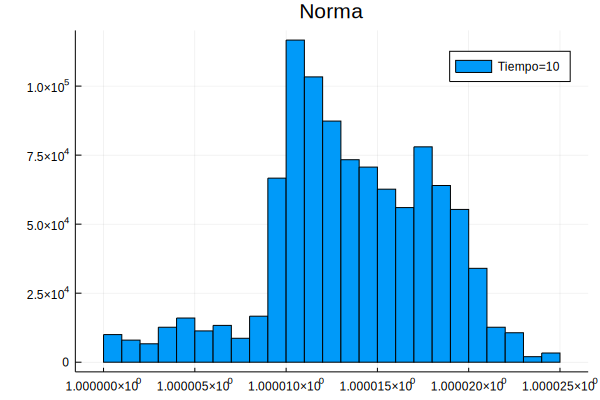

In [16]:
histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")

 90.635613 seconds (709.26 M allocations: 32.654 GiB, 6.22% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\Programas\JULIA\Animacion_Prueba_Float64.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\Programas\\JULIA\\Animacion_Prueba_Float64.gif")
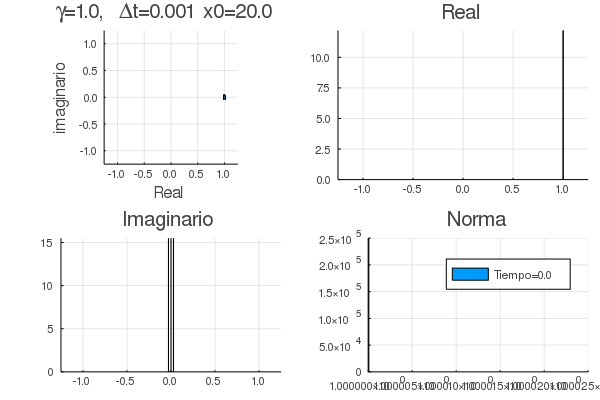

In [24]:
@time begin    
    anim= @animate for j=1:step:length(t)
        λ=lam_eigenvals(γ,x0,Δt,t[1:j],Δs,tiradas);
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)",xlims=(-1.25,1.25),ylims=(-1.25,1.25))
        Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1,1.000025),ylims=(0,2.5e5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_Float64.gif", fps=120)
end

In [14]:
function Mat(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    R
end

Mat (generic function with 1 method)

In [83]:
@time begin
    γ=1.0
    x0=20.0
    Δt=0.001
    N=2
    t=0:Δt:N
    Δs=Δt
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt)
    end;

  0.000915 seconds (7 allocations: 31.844 KiB)


In [84]:
length(t)
p=500

500

In [85]:
Mat(p,K,T,Δs)

3×3 Array{Float64,2}:
 0.455685  -0.679369    0.575173
 0.740255  -0.0696427  -0.668733
 0.494358   0.730507    0.471155

In [86]:
a1=eigen2(p,K,T,Δs).vectors[:,1]

3-element Array{Complex{Float64},1}:
 -0.02010849100038266 - 0.5036022960174994im
   0.7065263199824888 - 0.0im               
 -0.02040142524486567 + 0.4963715514164467im

In [73]:
a2=eigen2(p,K,T,Δs).vectors[:,2]*im

3-element Array{Complex{Float64},1}:
 -0.5053261217134122 + 0.01287104901255795im 
                -0.0 - 0.7068673287931426im  
 0.49461652895181185 + 0.013149737028039704im

In [74]:
a3=eigen2(p,K,T,Δs).vectors[:,3]

3-element Array{Complex{Float64},1}:
   0.6992565291849674 + 0.0im
 0.026022278428869526 + 0.0im
   0.7143970516579442 + 0.0im

In [75]:
a1[1]*a2[1]+a1[2]*a2[2]+a1[3]*a2[3]

0.0 + 0.9999999999999998im

In [76]:
a1[1]*a3[1]+a1[2]*a3[2]+a1[3]*a3[3]

-1.9726683828102942e-11 + 8.639589044179274e-12im

In [80]:
real(a2[1]*a3[1]+a2[2]*a3[2]+a2[3]*a3[3])

8.639589044179274e-12

In [82]:
real(a1)

3-element Array{Float64,1}:
  0.01287104901255795 
 -0.7068673287931426  
  0.013149737028039704